In this notebook, we're going to talk about the importance of image data and why we need to special tools to work with it.

# Important: Run this code cell each time you start a new session!

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install os
!pip install opencv-python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [2]:
!wget -Ncnp https://images.fineartamerica.com/images-medium-large-5/coloured-mri-scan-of-brain-in-sagittal-se-geoff-tompkinson.jpg

--2024-06-26 22:54:25--  https://images.fineartamerica.com/images-medium-large-5/coloured-mri-scan-of-brain-in-sagittal-se-geoff-tompkinson.jpg
Resolving images.fineartamerica.com (images.fineartamerica.com)... 99.84.191.85, 99.84.191.30, 99.84.191.100, ...
Connecting to images.fineartamerica.com (images.fineartamerica.com)|99.84.191.85|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 278914 (272K) [image/jpeg]
Saving to: ‘coloured-mri-scan-of-brain-in-sagittal-se-geoff-tompkinson.jpg’

coloured-mri-scan-o 100%[===================>] 272.38K  --.-KB/s    in 0.01s   

2024-06-26 22:54:25 (20.3 MB/s) - ‘coloured-mri-scan-of-brain-in-sagittal-se-geoff-tompkinson.jpg’ saved [278914/278914]



In [3]:
import shutil
import os
orig_file = os.path.join('coloured-mri-scan-of-brain-in-sagittal-se-geoff-tompkinson.jpg')

os.rename(orig_file, 'color_mri.jpg')

# What Is Image Data?


Digital images are used all over medicine. With cameras, we can capture images of people's faces, skin lesions, and other readily visible features. With imaging devices that leverage bespoke techniques (e.g., X-ray, MRI, ultrasound), we can capture visual content that would not otherwise be visible to us.

In computing, images are essentially multidimensional arrays, where the first two dimensions represent the height and width of the image and the third dimension represents the number of ***color channels*** (i.e., the number of numbers needed to represent the color of a given pixel).

The most common set of images you've probably encountered are ***RGB images***, where the color of a given pixel is specified according to the amount of red, green, and blue it contains. An RGB image with a height $h$ and width $w$ is therefore a $h \times w \times 3$ array.

In [4]:
# Load an image using OpenCV (will go over this library later)
img = cv2.imread('color_mri.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(type(img))

<class 'numpy.ndarray'>


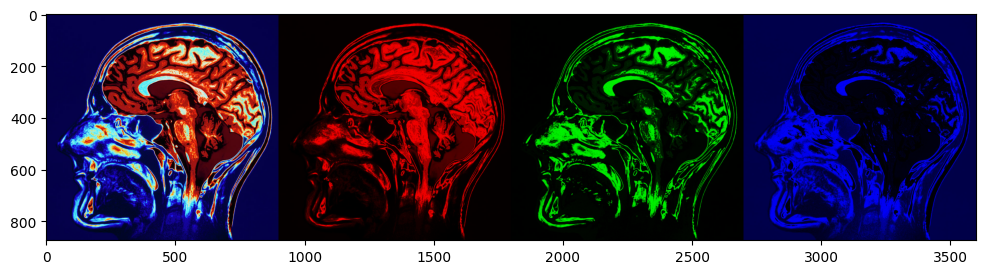

Image size: (874, 900, 3)
Color value at row 100, column 100: [ 5  1 75]


In [5]:
def split_into_channels(img):
    img_r = img.copy()
    img_r[:,:,1] = 0
    img_r[:,:,2] = 0
    img_g = img.copy()
    img_g[:,:,0] = 0
    img_g[:,:,2] = 0
    img_b = img.copy()
    img_b[:,:,0] = 0
    img_b[:,:,1] = 0
    return np.hstack((img, img_r, img_g, img_b))

# Show the image split across channels
stacked = split_into_channels(img)
plt.figure(figsize=(12, 3))
plt.imshow(stacked)
plt.show()

# Print relevant information
print(f'Image size: {img.shape}')
print(f'Color value at row 100, column 100: {img[100,100]}')

# Why Do We Need Something Fancy?

The dimensions of an image array have different meanings. The first two dimensions represent spatial information, and the number(s) at that position represent color information.

The techniques we've discussed up until this point have either operated on rows, columns, or entire arrays of data:

In [6]:
# Operations on a row or column
x = np.array(range(0, 10))
print(x.mean())
print(x*2)

4.5
[ 0  2  4  6  8 10 12 14 16 18]


In [7]:
# Operations on an entire array
x = np.ones((50, 50))
print(x.mean())
print(x*2)

1.0
[[2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 ...
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]]


When we work with images, we will often want to perform operations on the color information horizontally, vertically, and diagonally at the same time. Writing large `for` loops that operate column-by-column, row-by-row, and element-by-element would be way too time-consuming to get anything done, which has led to the creation of special techniques specifically for image analysis.

Nevertheless, it is important to remember that images are simply represented as numerical arrays, just like any other kinds of data we will examine this course.

# Summary

This session will provide an overview of how we can create and manipulate image data.